<a href="https://colab.research.google.com/github/rahul-727/Linear-regression/blob/main/LR_headbrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.shape

(237, 4)

In [4]:
 #collecting x and y
 X = data['Head Size(cm^3)'].values
 Y = data['Brain Weight(grams)'].values

In [5]:
# Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)

#Using the formula to calculate b1 and b0 or m and c
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) **2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

print(b1,b0)



0.26342933948939945 325.57342104944223


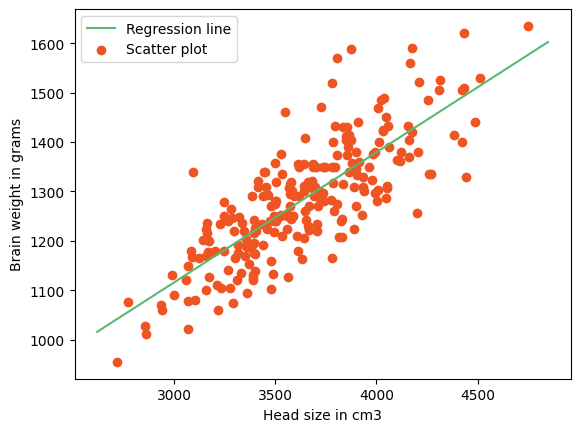

In [6]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#plotting line
plt.plot(x, y, color='#58b970', label='Regression line')
#plotting scatter points
plt.scatter(X, Y, c='#ef5423', label='Scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [9]:
# Calculating the root mean squares error
rmse = 0
for i in range(m):
  y_pred = b0 + b1 * X[i]
  rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print("RMSE")
print(rmse)

RMSE
[72.12062138]


In [7]:
# R square Method
ss_t = 0
ss_r = 0
for i in range(m):
  y_pred = b0 + b1 * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)


0.6393117199570003


In [8]:
# implementing using scikit learn library

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m, 1))

# Creating Model
reg = LinearRegression()

#Fitting training data
reg = reg.fit(X, Y)

# Y prediction
Y_pred = reg.predict(X)

#Calculating R2 Score
r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
